In [9]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv("Arrests.csv")
df.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699
6,7,1974628,16147655,29.0,M,W,2016-08-16T13:00:00,"2300 Block Pioneer AV Pittsburgh, PA 15226",2701 Simple Assault.,"2300 Block Pioneer AV Pittsburgh, PA 15226",Brookline,6,1919.0,4.0,5.0,-80.020357,40.400037
7,8,1974607,16146037,21.0,F,B,2016-08-16T04:25:00,"600 Block 1st AV Pittsburgh, PA 15219",2701 Simple Assault. / 5505 Public Drunkenness...,"700 Block S Braddock AV Pittsburgh, PA 15221",Regent Square,4,1410.0,NaN,NaN,-79.834462,40.398957
8,9,1974643,16132537,17.0,M,B,2016-08-29T17:55:00,"1400 Block Washington BL Pittsburgh, PA 15206",903 Criminal Conspiracy. / 3701 Robbery.,"N Euclid AV & Broad ST Pittsburgh, PA 15206",East Liberty,5,1115.0,NaN,NaN,NaN,NaN
9,10,1974647,16138646,14.0,M,B,2016-08-23T13:36:00,Zone 2,3127 Indecent Exposure. / 3123(a)(6) IDSI with...,Zone 5,NaN,5,NaN,NaN,NaN,NaN,NaN


The only column I need is the location of the crime so lets search for that.

In [8]:
df = df['INCIDENTNEIGHBORHOOD']
df.head(10)

0         Bloomfield
1       Outside City
2           Westwood
3     East Allegheny
4    Crafton Heights
5         Greenfield
6          Brookline
7      Regent Square
8       East Liberty
9                NaN
Name: INCIDENTNEIGHBORHOOD, dtype: object

There is a lot of unnessesary neighborhoods in this file, lets only keep the one's in Pittsburgh that were murder or assault.

In [10]:
neighborhoods = []
neighborhoodsDict = {}

for index, row in df.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    zipCode = row['INCIDENTLOCATION']
    crime = str(row['OFFENSES'])

    if '152' in zipCode and ('Assault' in crime or 'Homicide' in crime):
        neighborhoods.append(neighborhood)

for item in neighborhoods:
    if item in neighborhoodsDict:
        neighborhoodsDict[item] += 1
    else:
        neighborhoodsDict[item] = 1

for item in neighborhoodsDict:
    print(item)



Crafton Heights
Brookline
Regent Square
East Hills
Carrick
South Side Flats
East Carnegie
Point Breeze North
Perry South
Allentown
Golden Triangle/Civic Arena
Homewood North
Bloomfield
Hazelwood
Bedford Dwellings
Sheraden
Spring Hill-City View
Fineview
Marshall-Shadeland
Terrace Village
South Side Slopes
Homewood South
Garfield
Elliott
Allegheny Center
Mount Washington
California-Kirkbride
Banksville
Bon Air
Glen Hazel
Highland Park
Northview Heights
Knoxville
Greenfield
East Liberty
Bluff
Central Oakland
Morningside
Beechview
Brighton Heights
Shadyside
Upper Hill
North Shore
Crawford-Roberts
Spring Garden
Lincoln-Lemington-Belmar
Friendship
Homewood West
East Allegheny
Westwood
Central Lawrenceville
Stanton Heights
Arlington
West Oakland
Fairywood
South Oakland
Central Northside
Strip District
Mt. Oliver Neighborhood
Chateau
Perry North
Middle Hill
Manchester
South Shore
Beltzhoover
Overbrook
Troy Hill
Squirrel Hill South
Lincoln Place
Central Business District
Central North Side
Arli

Lets add up how many times an arrest was made in each of these neighborhoods, and sort it from least to most. This still leaves us with too much information, so lets only look at the 12 neighborhoods with the least amount of arrests.

In [11]:
names = []
values = []
i = 0
index = 0

for key, value in sorted(neighborhoodsDict.items(), key=lambda kv: kv[1], reverse=True):
    keyCheck = isinstance(key, str)
    if keyCheck == True:
        names.append(key)
        values.append(value)
    
newNames = names[len(names) - 12: len(names)]
newValues = values[len(values) - 12: len(values)]

while i < len(newNames):
    print(f"{newNames[i]}: {newValues[i]}")
    i += 1

East Carnegie: 16
Golden Triangle/Civic Arena: 16
New Homestead: 13
St. Clair: 12
Ridgemont: 8
Regent Square: 6
Outside City: 6
Mt. Oliver Boro: 4
Outside State: 4
Outside County: 2
Central Northside: 1
Mt. Oliver Neighborhood: 1


Now lets graph it out!

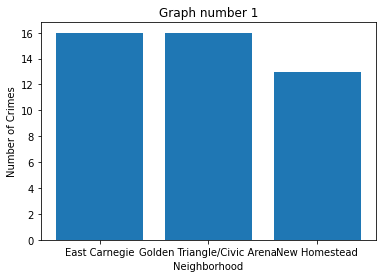

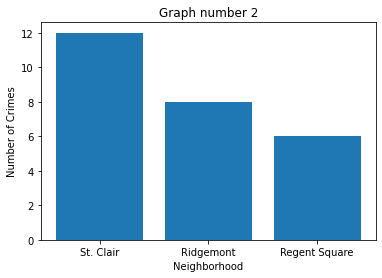

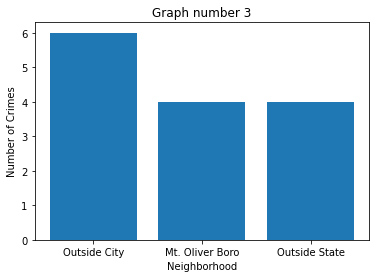

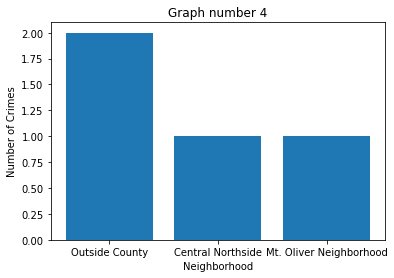

In [12]:
chunk_size = 3
index = 0
listsOfNames = [newNames[i:i + chunk_size] for i in range(0, len(newNames), chunk_size)]
listsOfValues = [newValues[i:i + chunk_size] for i in range(0, len(newValues), chunk_size)]

while index <= 3:
    plt.bar(listsOfNames[index], listsOfValues[index])
    plt.xlabel("Neighborhood")
    plt.ylabel('Number of Crimes')
    plt.title("Graph number {}".format(index + 1))
    plt.show()
    index += 1